<a href="https://colab.research.google.com/github/sluzkym/SQL-FINAL-PROJECT/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
playstore = pd.read_csv('googleplaystore.csv')

In [4]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [5]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [75]:
app_count = playstore['App'].value_counts()

#create a table
app_count_table = {
    'App': app_count.index,
    'Count': app_count.values
}
app_count_table = pd.DataFrame(app_count_table)
app_count_table

,App,Count
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,ESPN,7
3,Duolingo: Learn Languages Free,7
4,Candy Crush Saga,7
...,...,...
9654,"Meet U - Get Friends for Snapchat, Kik & Instagram",1
9655,U-Report,1
9656,U of I Community Credit Union,1
9657,Waiting For U Launcher Theme,1


In [7]:
database_count=len(playstore)
print(f'The database has {database_count} rows')

The database has 10840 rows


In [8]:
App_series=playstore['App']
num_of_Apps=App_series.nunique()
print(f'There are {num_of_Apps} different apps in the dataset')

There are 9659 different apps in the dataset


Rating Summary

In [184]:
min_rating=playstore['Rating'].min()
max_rating=playstore['Rating'].max()
std_rating=playstore['Rating'].std().round(2)
mode_rating=playstore['Rating'].mode()[0]
mean_rating=playstore['Rating'].mean().round(2)

#create a table
rating_stats = {
    'Min': [min_rating],
    'Max': [max_rating],
    'Mean': [std_rating],
    'STD': [mean_rating],
    'Mode': [mode_rating]
}

rating_stats_df = pd.DataFrame(rating_stats)
rating_stats_df.index = ['Rating Stats']
rating_stats_df


,Min,Max,Mean,STD,Mode
Rating Stats,0.0,5.0,1.51,3.62,0.0


Mean of rating for each app

In [19]:
playstore['Rating'] = pd.to_numeric(playstore['Rating'], errors='coerce')
playstore['Rating'] = playstore['Rating'].fillna(0)
mean_rating_app=playstore.groupby('App')['Rating'].mean().round(2)
#print(f'The mean rating for each app is:\n {mean_rating_app}')

#create a table
mean_rating_app_table={
    'App': mean_rating_app.index,
    'Mean Rating': mean_rating_app
}
mean_rating_app_table=pd.DataFrame(mean_rating_app)
mean_rating_app_table

,Rating
App,
"""i DT"" Fútbol. Todos Somos Técnicos.",0.0
#NAME?,3.5
+Download 4 Instagram Twitter,4.5
.R,4.5
/u/app,4.7
...,...
"뽕티비 - 개인방송, 인터넷방송, BJ방송",0.0
💎 I'm rich,3.8
"💘 WhatsLov: Smileys of love, stickers and GIF",4.6


In [183]:
max_rating_app=mean_rating_app.sort_values(ascending=False).head(1)
min_rating_app=mean_rating_app.sort_values(ascending=False).tail(1)

print(f'The app with the highest mean rating is:\n {max_rating_app}')
print(f'The app with the lowest mean rating is:\n {min_rating_app}')

The app with the highest mean rating is:
 App
Ríos de Fe    5.0
Name: Rating, dtype: float64
The app with the lowest mean rating is:
 App
"i DT" Fútbol. Todos Somos Técnicos.    0.0
Name: Rating, dtype: float64


Reviews mean for each Category

In [11]:
playstore['Reviews'] = pd.to_numeric(playstore['Reviews'], errors='coerce')
playstore['Reviews'] = playstore['Reviews'].fillna(0).astype(int)
reviews_mean_by_category=playstore.groupby('Category')['Reviews'].mean().round(2)
#print(f'The mean of reviews for each Category: \n {reviews_mean_by_category}')

#create a table
reviews_mean_by_category_table={
    'Category': reviews_mean_by_category.index,
    'Reviews Mean': reviews_mean_by_category
}
reviews_mean_by_category_table=pd.DataFrame(reviews_mean_by_category)
reviews_mean_by_category_table

,Reviews
Category,
ART_AND_DESIGN,26376.00
AUTO_AND_VEHICLES,13690.19
BEAUTY,7476.23
BOOKS_AND_REFERENCE,95060.90
BUSINESS,30335.98
COMICS,56387.93
COMMUNICATION,2107137.62
DATING,31159.31
EDUCATION,253819.14


Reviews Mean by Category

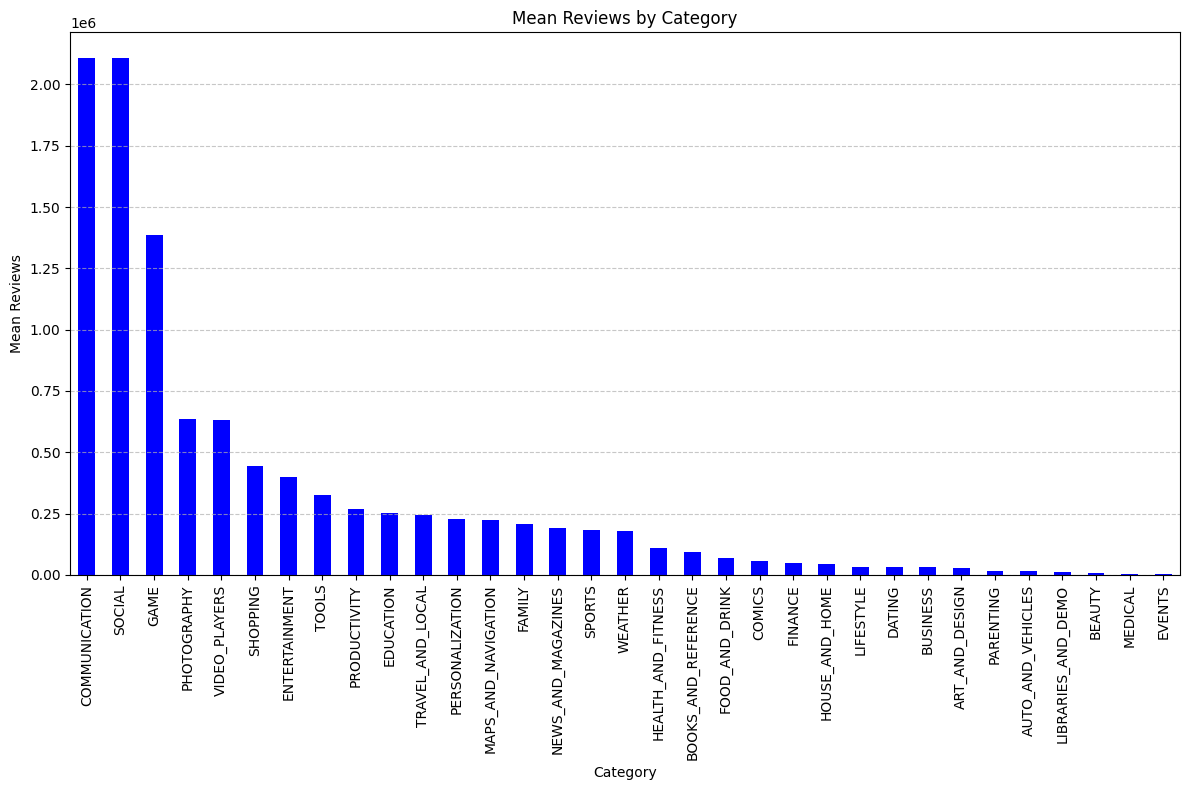

In [76]:
reviews_mean_by_category_sorted=reviews_mean_by_category.sort_values(ascending=False)

reviews_mean_by_category_sorted.plot(kind='bar',color='blue',figsize=(12, 8))
plt.title('Mean Reviews by Category')
plt.xlabel('Category')
plt.ylabel('Mean Reviews')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Size data cleaning

In [24]:
# Ensure all values in 'Installs' column are strings
playstore['Size'] = playstore['Size'].astype(str)

# Replace the '+' and ',' characters
playstore['Size'] = playstore['Size'].str.replace('M', '' ).str.replace('k', '')

playstore['Size'] = playstore['Size'].str.replace('Varies with device', 'NAN')

# Convert the cleaned 'Installs' column to numeric, with errors coerced to NaN
playstore['Size'] = pd.to_numeric(playstore['Size'], errors='coerce')

# Fill NaN values with 0 after conversion
playstore['Size'].fillna(0, inplace=True)

Size Summary

In [25]:
mean_size = playstore['Size'].mean().round(2)
std_size = playstore['Size'].std().round(2)
mode_size = playstore['Size'].mode()[0]
min_size = playstore['Size'].min()
max_size = playstore['Size'].max()

size_table = {
    'Mean': [mean_size],
    'STD': [std_size],
    'Min': [min_size],
    'Max': [max_size],
    'Mode': [mode_size]
}

size_table_df = pd.DataFrame(size_table)
size_table_df.index = ['Size Stats']
size_table_df


,Mean,STD,Min,Max,Mode
Size Stats,31.24,91.81,0.0,1020.0,0.0


 Size mean for each Category

In [27]:
size_mean_by_category=playstore.groupby('Category')['Size'].mean().round(2)
size_mean_by_category.fillna(0, inplace=True)

#create a table
size_mean_by_category_table={
    'Category': [size_mean_by_category.index],
    'Size Mean': [size_mean_by_category]
}
size_mean_by_category_table=pd.DataFrame(size_mean_by_category)
size_mean_by_category_table

,Size
Category,
ART_AND_DESIGN,11.80
AUTO_AND_VEHICLES,30.44
BEAUTY,12.23
BOOKS_AND_REFERENCE,34.41
BUSINESS,23.15
COMICS,29.00
COMMUNICATION,38.20
DATING,15.14
EDUCATION,21.72


Bar Plot of Mean Size by Category

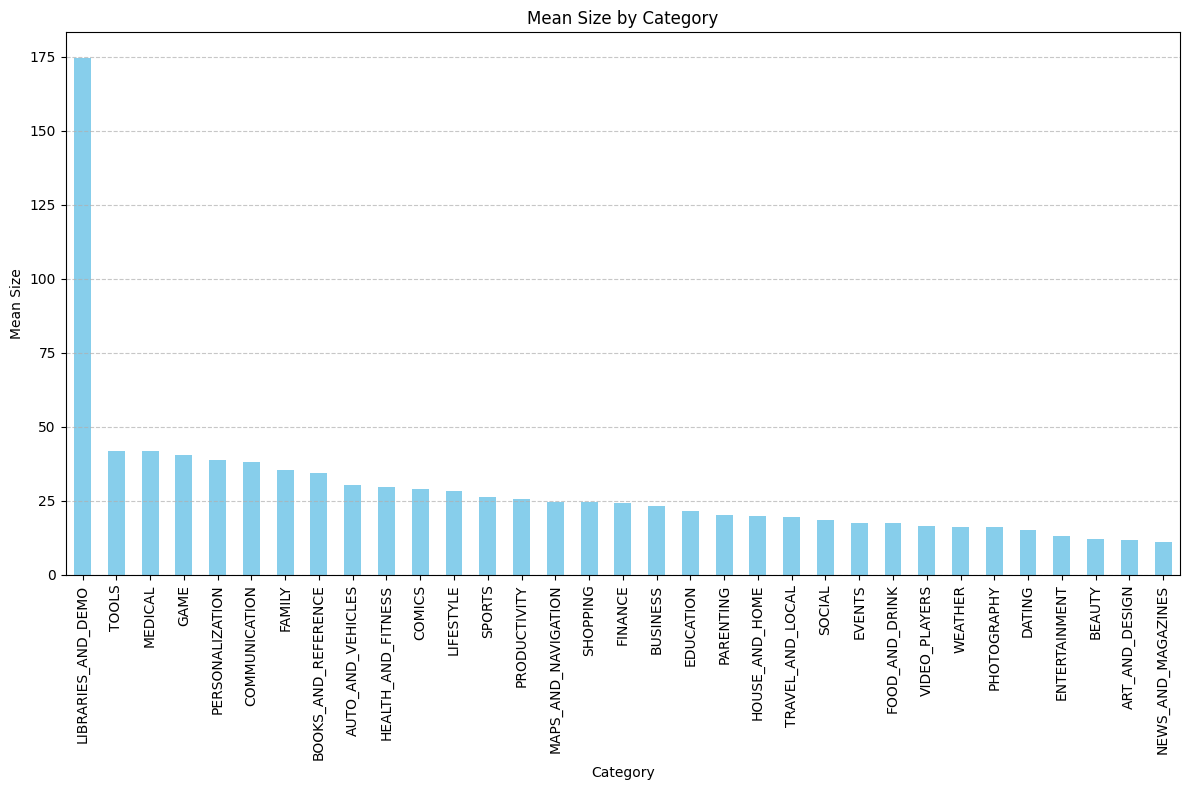

In [190]:
size_mean_by_category_sorted=size_mean_by_category.sort_values(ascending=False)
size_mean_by_category_sorted.plot(kind='bar',color='skyblue',figsize=(12, 8))
plt.title('Mean Size by Category')
plt.xlabel('Category')
plt.ylabel('Mean Size')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Table of Frequency of each Install Count

In [30]:
# Replace 'Free' with 0 in the 'Installs' column
playstore['Installs'] = playstore['Installs'].replace('Free', 0)

# Ensure all values in 'Installs' column are strings
playstore['Installs'] = playstore['Installs'].astype(str)

# Replace the '+' and ',' characters
playstore['Installs'] = playstore['Installs'].str.replace('+', '' ).str.replace(',', '')

# Convert the cleaned 'Installs' column to numeric, with errors coerced to NaN
playstore['Installs'] = pd.to_numeric(playstore['Installs'], errors='coerce')

# Fill NaN values with 0 after conversion
playstore['Installs'].fillna(0, inplace=True)

# Get the count of installs
installs_count = playstore['Installs'].value_counts().sort_index()

print(f'The Frequency of each Install Count us:/n {installs_count}')

The Frequency of each Install Count us:/n Installs
0               15
1               67
5               82
10             386
50             205
100            719
500            330
1000           907
5000           477
10000         1054
50000          479
100000        1169
500000         539
1000000       1579
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: count, dtype: int64


Table of average number of installs by category


In [47]:
installs_mean_by_category=playstore.groupby('Category')['Installs'].mean().round(2)
installs_mean_by_category.fillna(0, inplace=True)

#create a table
print("Average number of installs by category")
installs_mean_by_category_table={
    'Category': [installs_mean_by_category.index],
    'Installs Mean': [installs_mean_by_category]
}
installs_mean_by_category_table=pd.DataFrame(installs_mean_by_category)
installs_mean_by_category_table

Average number of installs by category


,Installs
Category,
ART_AND_DESIGN,1912893.85
AUTO_AND_VEHICLES,625061.31
BEAUTY,513151.89
BOOKS_AND_REFERENCE,8318050.11
BUSINESS,2178075.79
COMICS,934769.17
COMMUNICATION,84359886.95
DATING,1129533.36
EDUCATION,5586230.77


Bar Plot of Average Number of Installs by Category

---



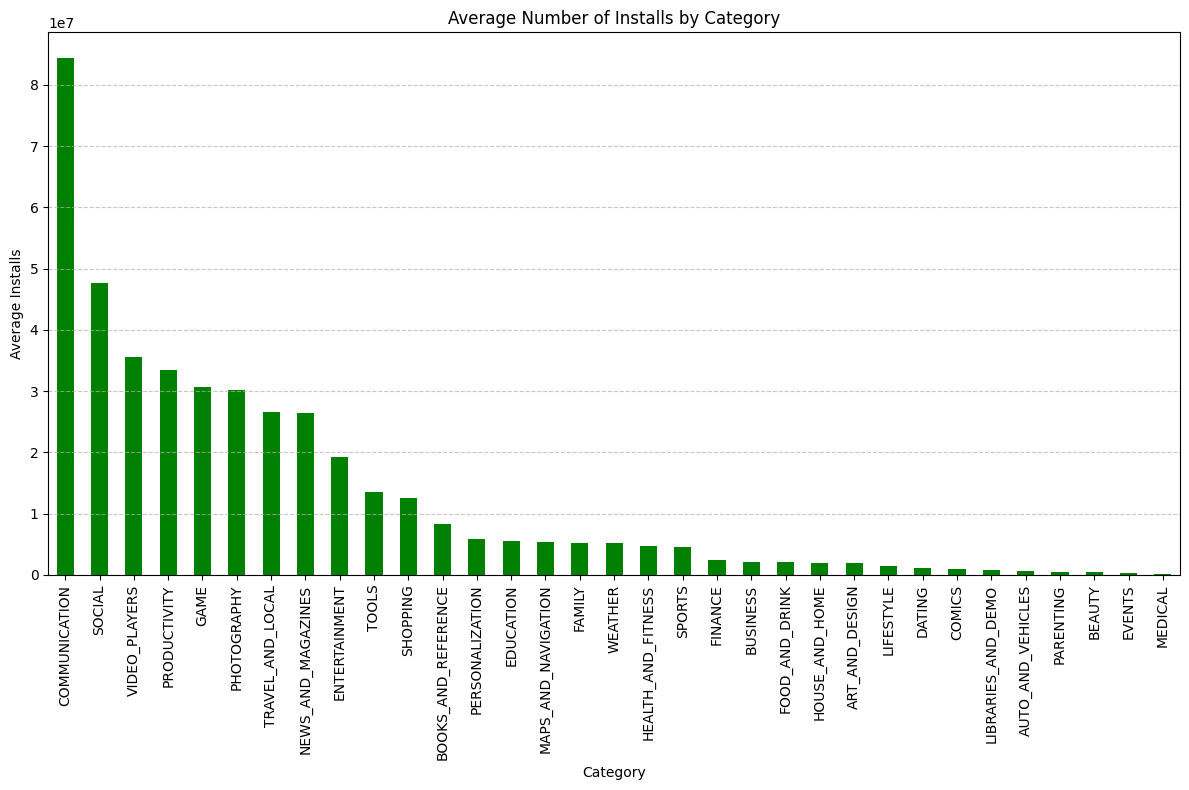

In [32]:
installs_mean_by_category_sorted=installs_mean_by_category.sort_values(ascending=False)

installs_mean_by_category_sorted.plot(kind='bar',color='green',figsize=(12, 8))
plt.title('Average Number of Installs by Category')
plt.xlabel('Category')
plt.ylabel('Average Installs')
plt.xticks(rotation=90)  # Rotate category labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
max_mean_installs_category=installs_mean_by_category.sort_values(ascending=False).head(1)
print(f'The category with the highest mean of installs is:\n {max_mean_installs_category}')

min_mean_installs_category=installs_mean_by_category.sort_values(ascending=False).tail(1)
print(f'The category with the lowest mean of installs is:\n {min_mean_installs_category}')


The category with the highest mean of installs is:
 Category
COMMUNICATION    84359886.95
Name: Installs, dtype: float64
The category with the lowest mean of installs is:
 Category
MEDICAL    115026.86
Name: Installs, dtype: float64


Instals mean by Type

In [35]:
installs_mean_type=playstore.groupby('Type')['Installs'].mean().round(2)
installs_mean_type

,Installs
Type,
Free,16690953.02
Paid,91195.10


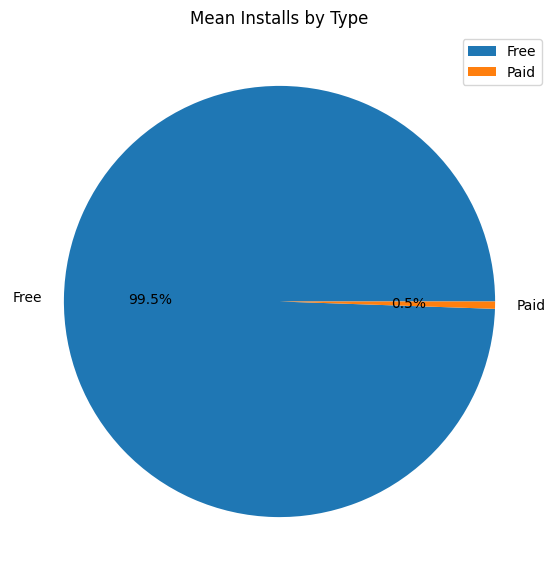

In [193]:
installs_mean_type.plot(kind='pie',
                                   autopct='%1.1f%%',
                                   figsize=(10, 7),
                                   title='Mean Installs by Type',
                                   legend=True)

plt.ylabel('')  # Hide the y-label
plt.show()

Table of Installs Mean by Category and Type

In [46]:
installs_mean_by_category_type=playstore.groupby(['Type', 'Category'])['Installs'].mean().round(2).sort_values()


#create a table
print("Installs Mean by Category and Type")
installs_mean_by_category_type_table={
    'Category and Type': [installs_mean_by_category_type.index],
    'Installs Mean': [installs_mean_by_category_type]
}
installs_mean_by_category_type_table=pd.DataFrame(installs_mean_by_category_type)
installs_mean_by_category_type_table

Installs Mean by Category and Type


Installs
Type Category                        
Paid EVENTS                      1.00
     LIBRARIES_AND_DEMO        100.00
     BOOKS_AND_REFERENCE       832.71
     SOCIAL                   2000.00
     NEWS_AND_MAGAZINES       2750.00
...                               ...
Free GAME                 33048939.16
     PRODUCTIVITY         35794644.73
     VIDEO_PLAYERS        36385565.61
     SOCIAL               48184458.57
     COMMUNICATION        90683100.56

[63 rows x 1 columns]

In [43]:
max_installs_mean_by_category_type=installs_mean_by_category_type.sort_values(ascending=False).head(1)
print(f'The category and type with the highest mean of installs is:\n {max_installs_mean_by_category_type}')

min_installs_mean_category_type=installs_mean_by_category_type.sort_values(ascending=False).tail(1)
print(f'The category and type with the lowest mean of installs is:\n {min_mean_installs_category_type}')




The category and type with the highest mean of installs is:
 Type  Category     
Free  COMMUNICATION    90683100.56
Name: Installs, dtype: float64
The category and type with the lowest mean of installs is:
 Type  Category
Paid  EVENTS      1.0
Name: Installs, dtype: float64


Table of Price Mean by Categories

In [45]:
playstore['Price'] = playstore['Price'].astype(str).replace('Everyone', '0').str.replace('$', '').str.replace('nan','0')
playstore['Price']=pd.to_numeric(playstore['Price'],errors='coerce')

price_mean_by_categories=playstore.groupby('Category')['Price'].mean().round(2)


#create a table
print("Price Mean by Categories")
price_mean_by_categories_table={
    'Category': [price_mean_by_categories.index],
    'Price Mean': [price_mean_by_categories]
}
price_mean_by_categories_table=pd.DataFrame(price_mean_by_categories)
price_mean_by_categories_table

Price Mean by Categories


,Price
Category,
ART_AND_DESIGN,0.09
AUTO_AND_VEHICLES,0.16
BEAUTY,0.00
BOOKS_AND_REFERENCE,0.52
BUSINESS,0.40
COMICS,0.00
COMMUNICATION,0.21
DATING,0.13
EDUCATION,0.12


Bar Plot of Mean Price by Category

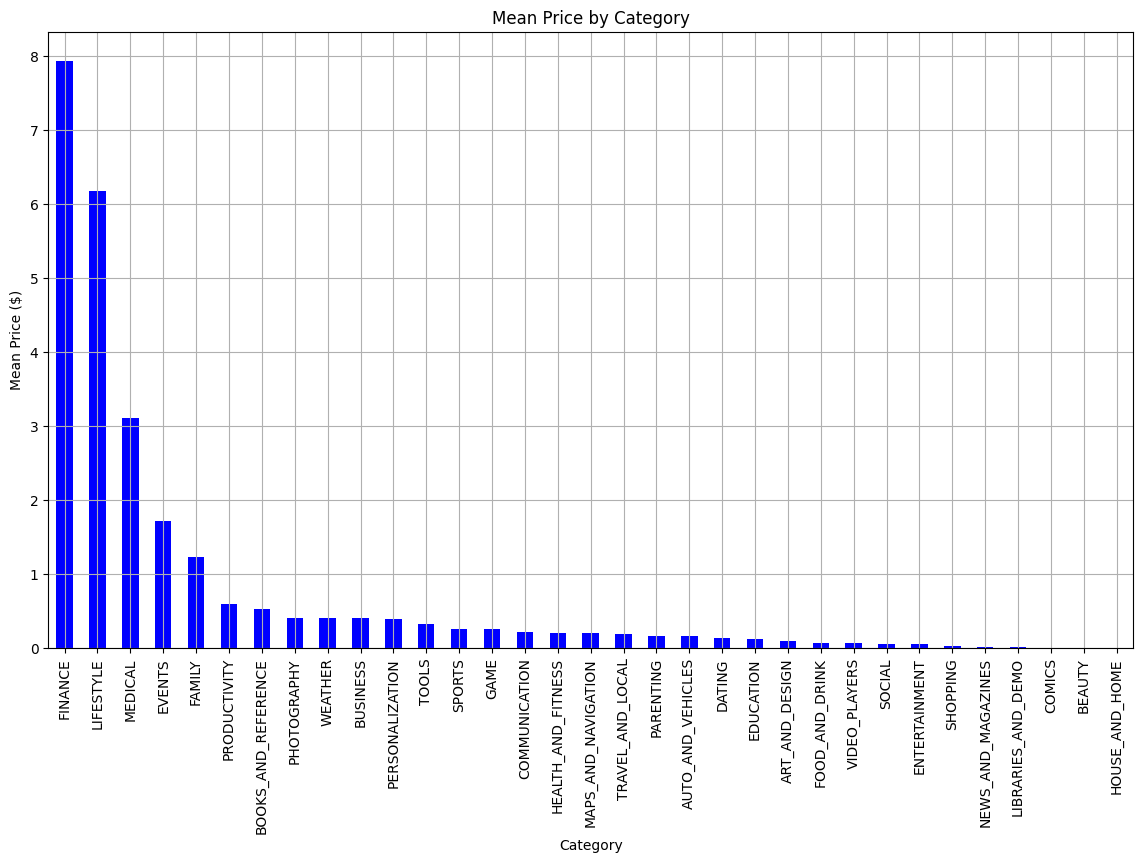

In [176]:
price_mean_by_categories_sorted=price_mean_by_categories.sort_values(ascending=False)

price_mean_by_categories_sorted.plot(kind='bar', color='blue',figsize=(14, 8))
plt.xlabel('Category')
plt.ylabel('Mean Price ($)')
plt.title('Mean Price by Category')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Table of Mean Price by Type and Category

In [48]:
mean_price_by_type_category = playstore.groupby(['Type','Category'])['Price'].mean().round(2)


#create a table
print("Mean Price by Type and Category")
mean_price_by_type_category_table={
    'Type and Category': [mean_price_by_type_category.index],
    'Mean Price': [mean_price_by_type_category]
}
mean_price_by_type_category_table=pd.DataFrame(mean_price_by_type_category)
mean_price_by_type_category_table

Mean Price by Type and Category


Price
Type Category                  
Free ART_AND_DESIGN        0.00
     AUTO_AND_VEHICLES     0.00
     BEAUTY                0.00
     BOOKS_AND_REFERENCE   0.00
     BUSINESS              0.00
...                         ...
Paid SPORTS                4.17
     TOOLS                 3.43
     TRAVEL_AND_LOCAL      4.16
     VIDEO_PLAYERS         2.62
     WEATHER               4.05

[63 rows x 1 columns]

Table of Mean Rating by Content Rating

In [49]:
playstore['Rating'] = pd.to_numeric(playstore['Rating'], errors='coerce')
playstore['Rating'] = playstore['Rating'].fillna(0)
mean_rating_by_content_rating = playstore.groupby('Content Rating')['Rating'].mean().round(2)
mean_rating_by_content_rating_sorted=mean_rating_by_content_rating.sort_values(ascending=False)

#create a table
print("Mean Rating by Content Rating")
mean_rating_by_content_rating_table={
    'Content Rating': [mean_rating_by_content_rating.index],
    'Mean Rating': [mean_rating_by_content_rating]
}
mean_rating_by_content_rating_table=pd.DataFrame(mean_rating_by_content_rating)
mean_rating_by_content_rating_table

Mean Rating by Content Rating


,Rating
Content Rating,
Adults only 18+,4.30
Everyone,3.56
Everyone 10+,4.08
Mature 17+,3.81
Teen,3.80
Unrated,2.05


Pie plot of Mean Rating % by Content Rating

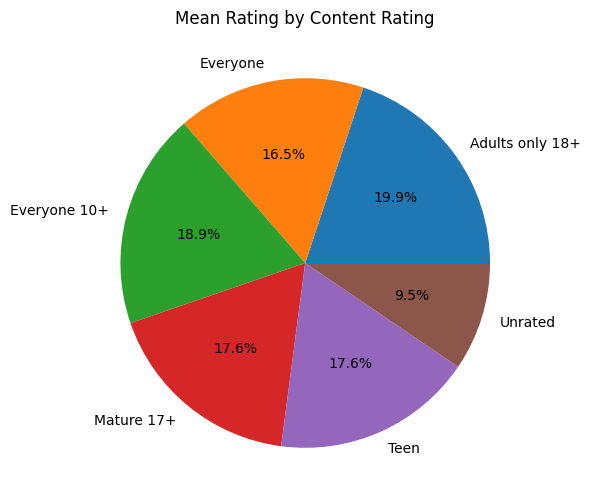

In [50]:
mean_rating_by_content_rating.plot(kind='pie',
                                   autopct='%1.1f%%',
                                   figsize=(8,6),
                                   title='Mean Rating by Content Rating',
                                   legend=False)

plt.ylabel('')  # Hide the y-label
plt.show()

Table of Rating by Content Rating and Category

In [52]:
rating_by_category_content_rating=playstore.groupby(['Content Rating','Category'])['Rating'].mean().round(2)

#create a table
print("Rating by Content Rating and Category")
rating_by_category_content_rating_table={
    'Content Rating and Category': [rating_by_category_content_rating.index],
    'Rating': [rating_by_category_content_rating]
}
rating_by_category_content_rating_table=pd.DataFrame(rating_by_category_content_rating)
rating_by_category_content_rating_table

Rating by Content Rating and Category


Rating
Content Rating  Category                 
Adults only 18+ COMICS               4.20
                SPORTS               4.50
Everyone        ART_AND_DESIGN       4.13
                AUTO_AND_VEHICLES    3.58
                BEAUTY               3.72
...                                   ...
Teen            TRAVEL_AND_LOCAL     3.38
                VIDEO_PLAYERS        4.09
                WEATHER              4.45
Unrated         FAMILY               0.00
                TOOLS                4.10

[118 rows x 1 columns]

Content Rating Count

In [76]:
content_rating_count=playstore['Content Rating'].value_counts()

#create a table
print("Content Rating Count")
content_rating_count_table = {
    'Content Rating': content_rating_count.index,
    'Count': content_rating_count.values
}
content_rating_count_table = pd.DataFrame(content_rating_count_table)
content_rating_count_table.set_index('Content Rating', inplace=True)
content_rating_count_table


Content Rating Count


,Count
Content Rating,
Everyone,8714
Teen,1208
Mature 17+,499
Everyone 10+,414
Adults only 18+,3
Unrated,2


Content Rating Count %

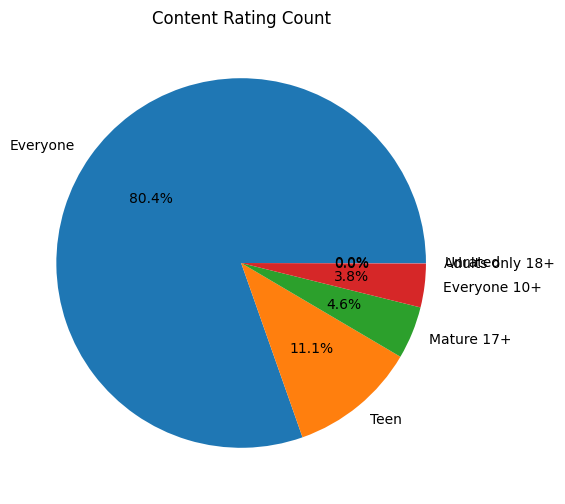

In [198]:
content_rating_count.plot(kind='pie',
                                   autopct='%1.1f%%',
                                   figsize=(8,6),
                                   title='Content Rating Count',
                                   legend=False)

plt.ylabel('')  # Hide the y-label
plt.show()

Installs Mean by Content Rating

In [65]:
installs_mean_by_content_rating=playstore.groupby('Content Rating')['Installs'].mean().round(2).sort_values(ascending=False)

#create a table
print("Installs Mean by Content Rating")
installs_mean_by_content_rating_table={
    'Content Rating': [installs_mean_by_content_rating.index],
    'Installs Mean': [installs_mean_by_content_rating]
}
installs_mean_by_content_rating_table=pd.DataFrame(installs_mean_by_content_rating)
installs_mean_by_content_rating_table

Installs Mean by Content Rating


,Installs
Content Rating,
Everyone 10+,31965898.06
Teen,28738700.66
Everyone,13100374.07
Mature 17+,11071124.61
Adults only 18+,666666.67
Unrated,25250.00


Pie plot of Installs Mean % by Content Rating

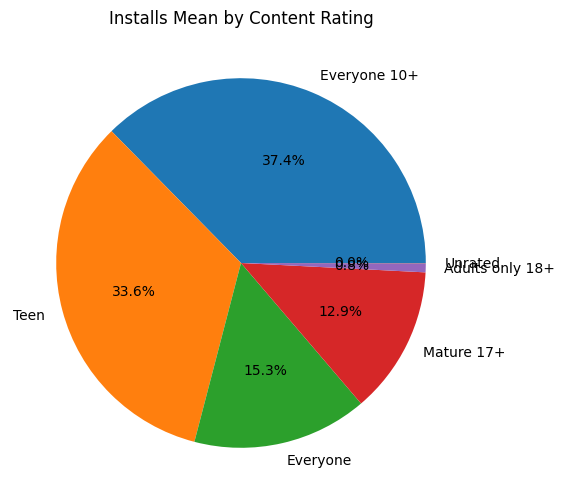

In [199]:
installs_mean_by_content_rating.plot(kind='pie',
                                   autopct='%1.1f%%',
                                   figsize=(8, 6),
                                   title='Installs Mean by Content Rating',
                                   legend=False)

plt.ylabel('')  # Hide the y-label
plt.show()

Table of Installs Amount by Year

In [69]:
# Convert  'Last Updated' column to datetime
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'], format='%m/%d/%Y')

# Extract year from the 'Date' column
playstore['Year'] = playstore['Last Updated'].dt.year

# Group by 'Year' and aggregate 'Installs'
installs_by_year = playstore.groupby('Year')['Installs'].count()

#create a table
print("Installs Amount by Year")
installs_by_year_table={
    'Year': [installs_by_year.index],
    'Installs Amount': [installs_by_year]
}
installs_by_year_table=pd.DataFrame(installs_by_year)
installs_by_year_table


Installs Amount by Year


,Installs
Year,
2010,1
2011,15
2012,26
2013,110
2014,209
2015,459
2016,804
2017,1867
2018,7349


Bar Plot of Installs Amount by Year

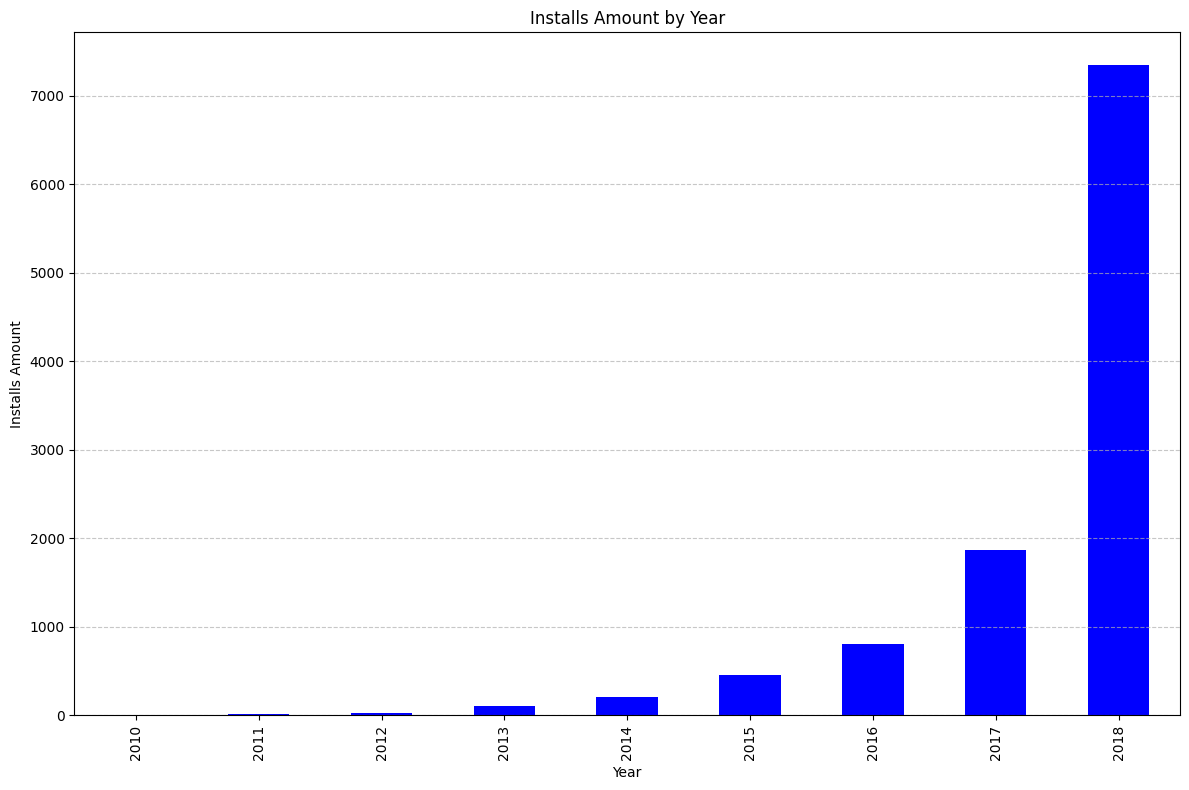

In [155]:
installs_by_year.plot(kind='bar',color='blue',figsize=(12, 8))
plt.title('Installs Amount by Year')
plt.xlabel('Year')
plt.ylabel('Installs Amount')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

Mean Price by Year

In [74]:
playstore['Year'] = playstore['Last Updated'].dt.year
price_mean_year=playstore.groupby('Year')['Price'].mean().round(2)

#create a table
print("Mean Price by Year $")
price_mean_year_table={
    'Year': [price_mean_year.index],
    'Mean Price': [price_mean_year]
}
price_mean_year_table=pd.DataFrame(price_mean_year)
price_mean_year_table

Mean Price by Year $


,Price
Year,
2010,0.00
2011,0.50
2012,0.32
2013,0.92
2014,1.36
2015,1.33
2016,0.57
2017,1.98
2018,0.81


Mean Price by Year


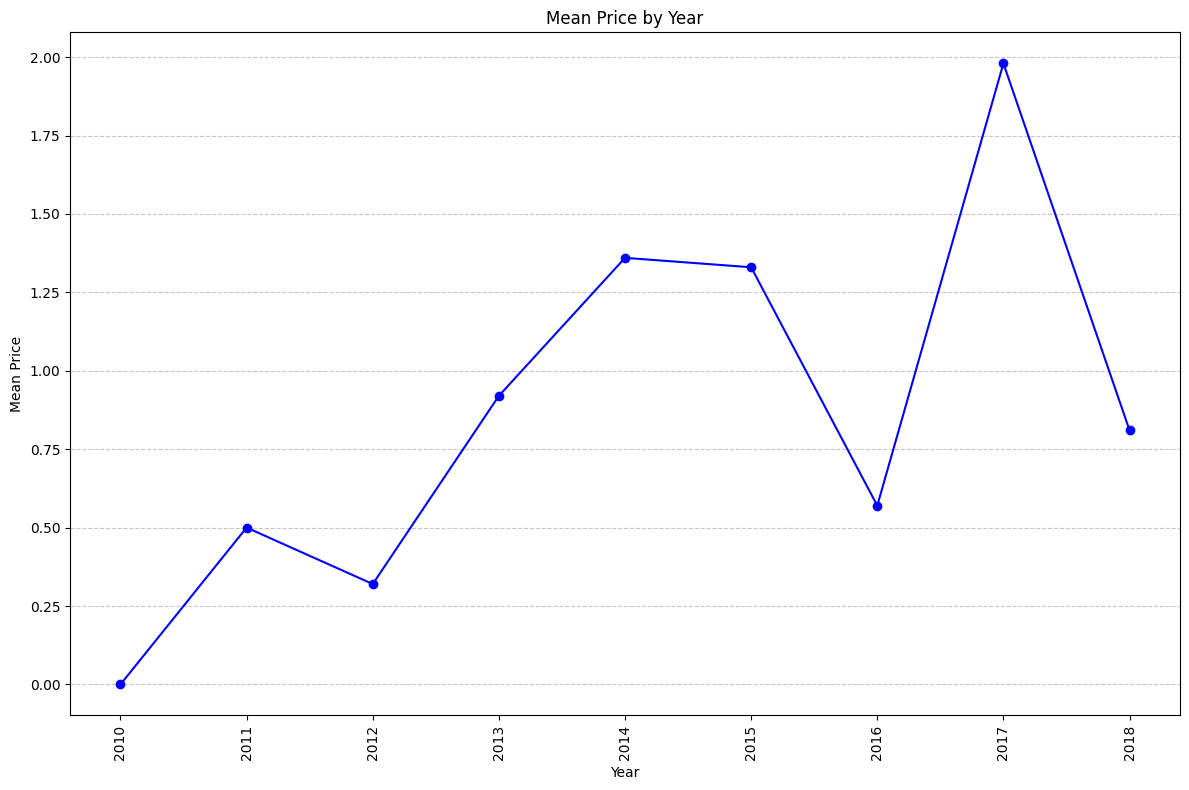

In [72]:

price_mean_year.plot(kind='line',color='blue',figsize=(12, 8), marker='o')
plt.title('Mean Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Mean Rating by Year

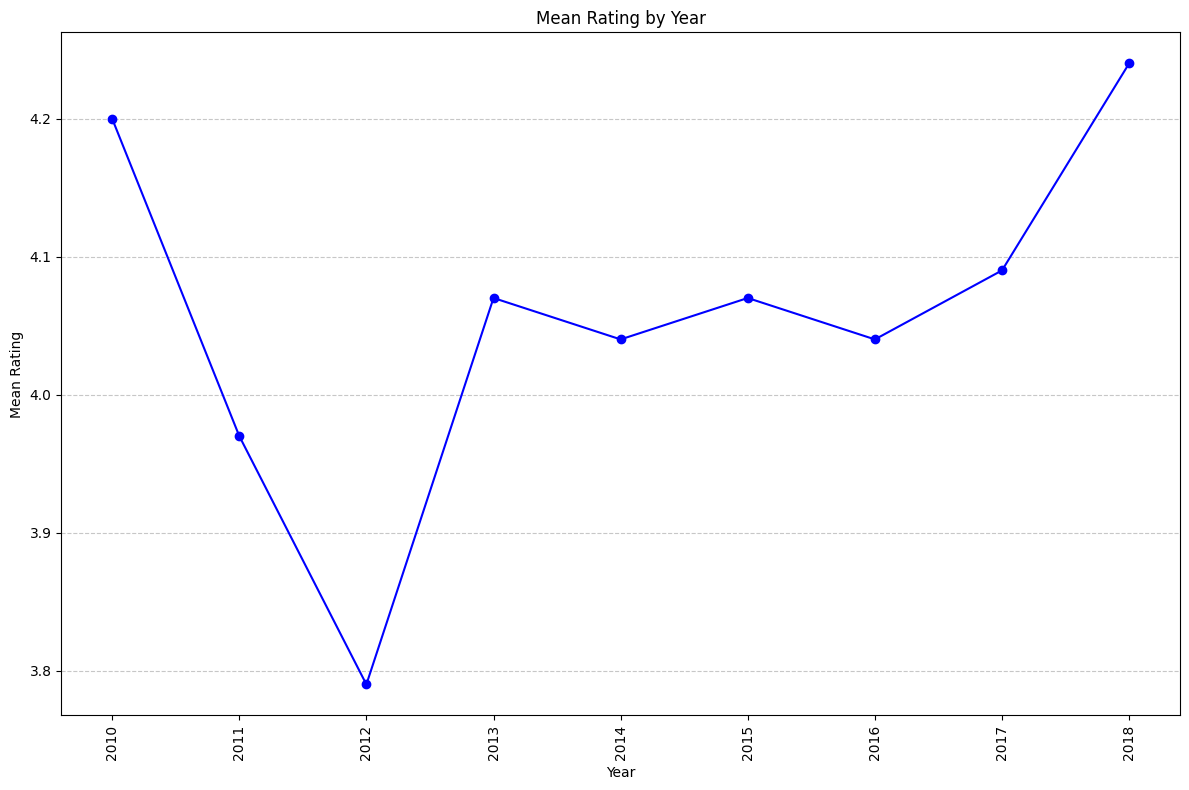

In [161]:
rating_mean_year=playstore.groupby('Year')['Rating'].mean().round(2)

rating_mean_year.plot(kind='line',color='blue',figsize=(12, 8), marker='o')
plt.title('Mean Rating by Year')
plt.xlabel('Year')
plt.ylabel('Mean Rating')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
